# Medical Insurance Regression

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data cleaning/pre-processing

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/moonjukhim/ml/main/data/insurance.csv")
print(df.shape)
df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

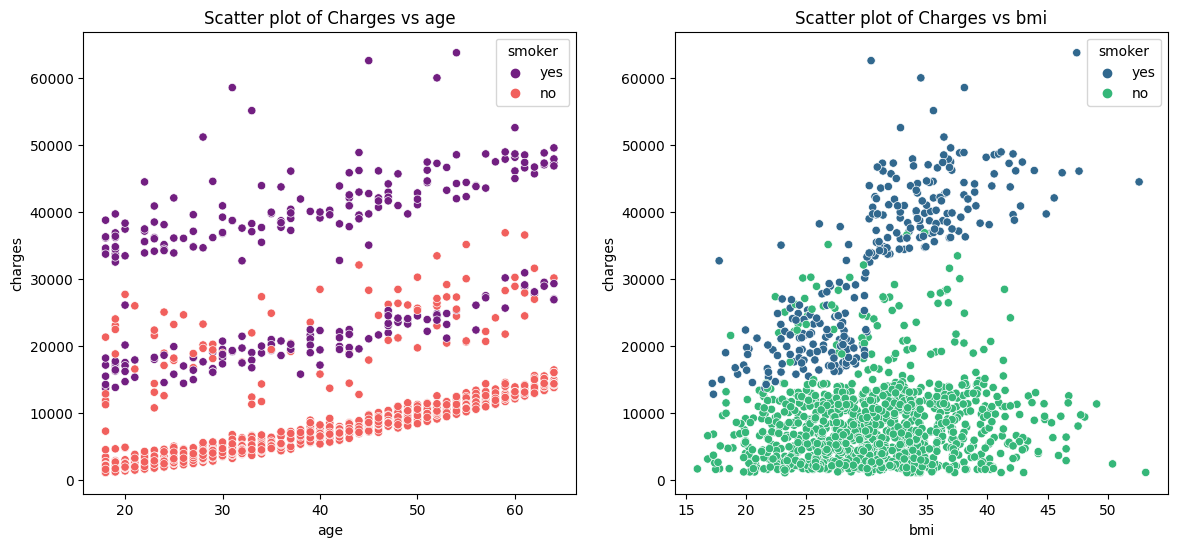

In [49]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [7]:
df2 = pd.get_dummies(df)
print(df2.dtypes)
print(df2.columns)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object
Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Categorical variables were transformed into dummy variables in order to be able to use them in the models.

#### Exploratory Data Analysis (EDA)

In [8]:
df2.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.505232,0.795217,0.204783,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.500160,0.403694,0.403694,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Skewness: 1.515880
Kurtosis: 1.606299


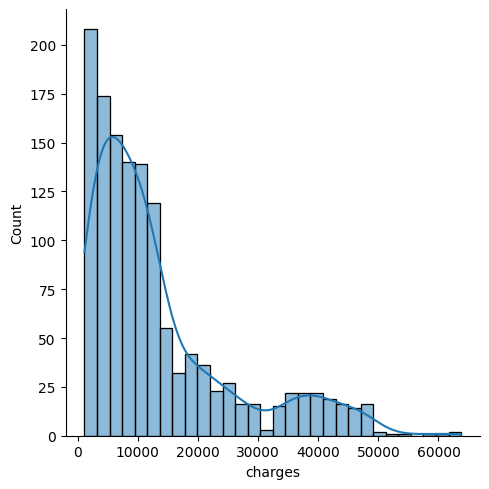

In [9]:
ax = sns.displot((df2['charges']), kde = True)
print("Skewness: %f" % df2['charges'].skew())
print("Kurtosis: %f" % df2['charges'].kurt())

Skewness: 0.055673
Kurtosis: -1.245088


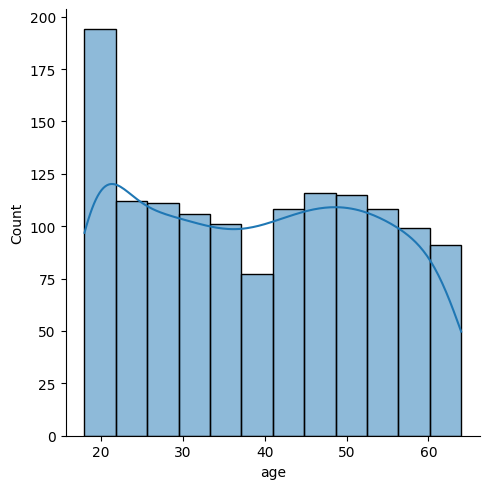

In [10]:
ax = sns.displot((df2['age']), kde = True)
print("Skewness: %f" % df2['age'].skew())
print("Kurtosis: %f" % df2['age'].kurt())

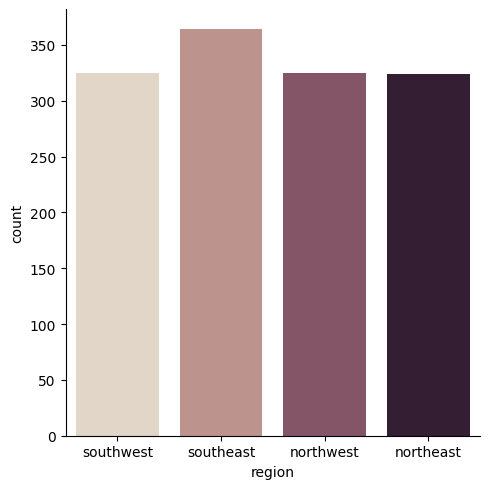

In [11]:
sns.catplot(x= 'region', kind="count", palette="ch:.25", data=df)

#### Feature Creation

In [12]:
df2['overweight'] = (df2.bmi >= 30).astype(int)
df2['unhealthy'] = df2.smoker_yes * df2.overweight

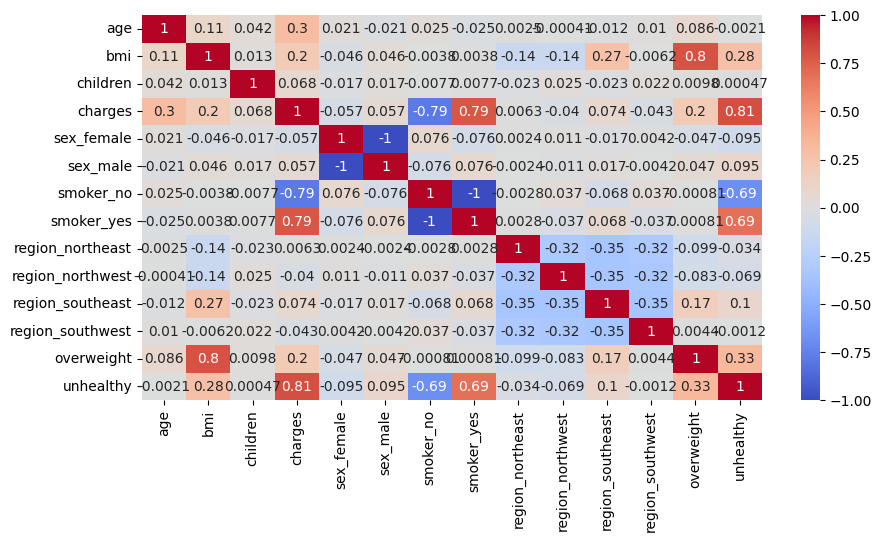

In [13]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

plt.show()

In [14]:
df2.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'overweight', 'unhealthy'],
      dtype='object')

In [15]:
x = df2[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest', 'overweight', 'unhealthy']]
y = df2[['charges']]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Modeling

In [22]:
# Random Forest Regression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV

rf_Model = RandomForestRegressor()
print("Random Forest regression score: ", np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5))   

Random Forest regression score:  0.81521


In [23]:
param_grid = {'n_estimators': [int(x) for x in np.linspace(50, 100, num = 3)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [2, 4, 8],
               'min_samples_split': [2, 5,10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
print(param_grid)

{'n_estimators': [50, 75, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_Model = RandomForestRegressor()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=0, n_jobs = 4)
rf_Grid.fit(x_train, y_train.values.ravel())
print(rf_Grid.best_params_)
print("Random Forest regression with hyperparameter tuning best score: ", np.round(rf_Grid.best_score_, 5))
print("Random Forest regression improvement after hyperparameter tuning: {0}%".format(np.round((1 - ((np.round(np.mean(cross_val_score(rf_Model, x_train, y_train.values.ravel(), cv = 5, scoring = "r2")), 5)) 
                                                                                             / np.round(rf_Grid.best_score_, 5))) * 100, 5)))

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 75}
Random Forest regression with hyperparameter tuning best score:  0.84687
Random Forest regression improvement after hyperparameter tuning: 4.27811%


### Model Evaluation

In [25]:
forest_yhat = rf_Grid.best_estimator_.predict(x_test)

In [27]:
from sklearn.metrics import r2_score

print("Random forest regression accuracy: %.2f" % r2_score(y_test, forest_yhat) )

Random forest regression accuracy: 0.89


In [29]:
from sklearn.metrics import mean_squared_error

print("Random forest regression MSE: %.2f" % mean_squared_error(y_test, forest_yhat) )

Random forest regression MSE: 17021937.49


# Neural Network

In [40]:
import math
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError

In [31]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
    return model

ann = build_model_using_sequential()

2023-01-25 06:01:24.146934: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

In [33]:
# loss function
mse = MeanSquaredError()
ann.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[mse]
)
# train the model
history = ann.fit(
    x_train.values, 
    y_train.values, 
    epochs=40, 
    batch_size=64,
    validation_split=0.2
)


2023-01-25 06:01:52.768344: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
14/14 [==============================] - 1s 41ms/step - loss: 223066560.0000 - mean_squared_error: 224766032.0000 - val_loss: 147686176.0000 - val_mean_squared_error: 142974224.0000
Epoch 2/40
14/14 [==============================] - 0s 11ms/step - loss: 126085576.0000 - mean_squared_error: 127293840.0000 - val_loss: 140218752.0000 - val_mean_squared_error: 136162304.0000
Epoch 3/40
14/14 [==============================] - 0s 12ms/step - loss: 114664776.0000 - mean_squared_error: 113767816.0000 - val_loss: 126465088.0000 - val_mean_squared_error: 124243768.0000
Epoch 4/40
14/14 [==============================] - 0s 10ms/step - loss: 118924640.0000 - mean_squared_error: 119866480.0000 - val_loss: 115055272.0000 - val_mean_squared_error: 113768272.0000
Epoch 5/40
14/14 [==============================] - 0s 15ms/step - loss: 95577680.0000 - mean_squared_error: 95199352.0000 - val_loss: 97109664.0000 - val_mean_squared_error: 97055248.0000
Epoch 6/40
14/14 [=====================

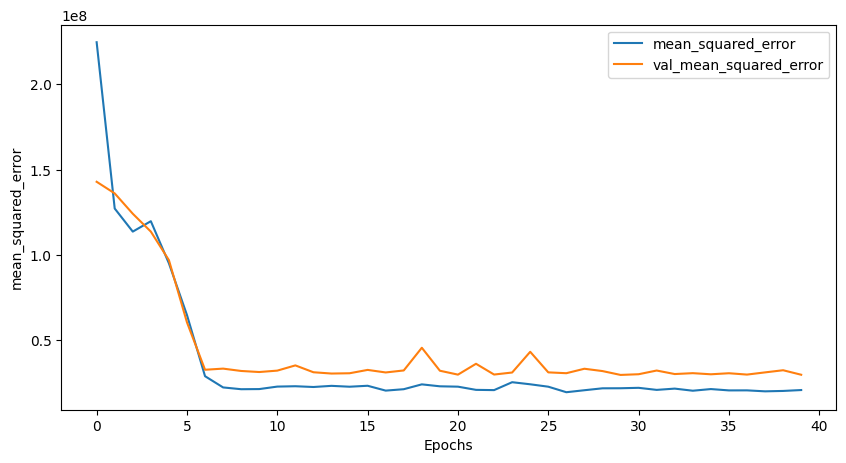

In [34]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_error')

In [35]:
nn_yhat = ann.predict(x_test)

In [41]:
print("Neural Net regression accuracy in MSE: %.2f" % mean_squared_error(y_test, nn_yhat) )
print("Neural Net regression accuracy in R2: %.2f" % r2_score(y_test, nn_yhat) )

Neural Net regression accuracy in MSE: 16523360.61
Neural Net regression accuracy in R2: 0.90


In [43]:
np.sqrt(16523360.61)

4064.8936775763273